In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [52]:
data = load_iris()
data = pd.DataFrame(np.concatenate([data.data, data.target.reshape(-1, 1)], axis=1),
                    columns=data.feature_names + ['target'])
data = data[data.loc[:, 'target'] < 2]

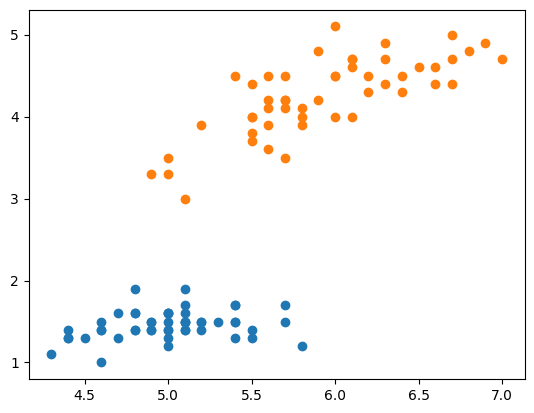

In [53]:
plt.scatter(data[data['target']==0].iloc[:, 0], data[data['target']==0].iloc[:, 2])
plt.scatter(data[data['target']==1].iloc[:, 0], data[data['target']==1].iloc[:, 2])
plt.show()

In [54]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [55]:
x = np.array(data.iloc[:, [0, 2]])
y = np.array(data.loc[:, 'target']).reshape(-1, 1)

In [56]:
print(x.shape)
print(y.shape)

(100, 2)
(100, 1)


In [57]:
normalisation = StandardScaler()
x = normalisation.fit_transform(x)

# Implémentation du SVM

In [58]:
class SVMClassifier:

    def __init__(self, x_, c_):
        _, n = x_.shape
        self.theta_ = np.random.rand(n+1, 1)
        self.c_ = c_

    def predict(self, x_):
        m, n = x_.shape
        X_ = np.hstack(( np.ones((m, 1)), x_ ))
        return np.where((X_ @ self.theta_) >= 0, 1, -1)

    def cost_function(self, x_, yi):
        m, n = x_.shape
        y_ = np.copy(yi); y_[y_==0] = -1
        X_ = np.hstack(( np.ones((m, 1)), x_ ))
        return (0.5 * np.linalg.norm(self.theta_**2)) + (self.c_ * (1/m) * np.sum(np.maximum( (1 - y_ * (X_ @ self.theta_)), 0 )))

    def fit(self, x_, yi, learning_rate=0.01, n_iterations=1000):
        m, n = x_.shape
        y_ = np.copy(yi); y_[y_==0] = -1
        X_ = np.hstack(( np.ones((m, 1)), x_ ))
        cost_history = np.zeros(n_iterations)

        for i in range(0, n_iterations):

            margins = 1 - y_ * (X_ @ self.theta_)
            indicator = (margins > 0).astype(int)
            grad = self.theta_ - (self.c_/m) * (X_.T @ (y_ * indicator))

            self.theta_ = self.theta_ - learning_rate * grad
            cost_history[i] = self.cost_function(x_, y_)

        return cost_history

In [59]:
svm = SVMClassifier(x_=x, c_=12)
j_hist = svm.fit(x, y)

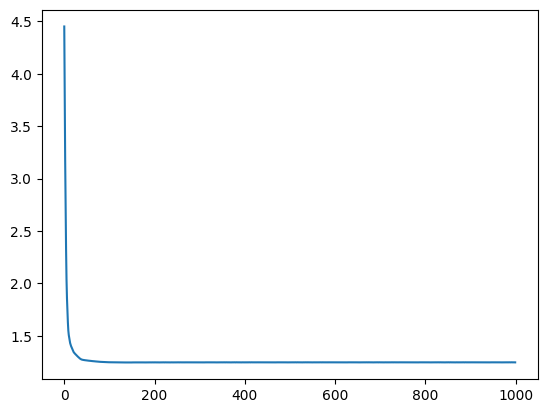

In [60]:
plt.plot(j_hist)
plt.show()

f(x) = a.x1 + b.x2 + c

donc x2 = (1/b) * (-a.x1 - c)

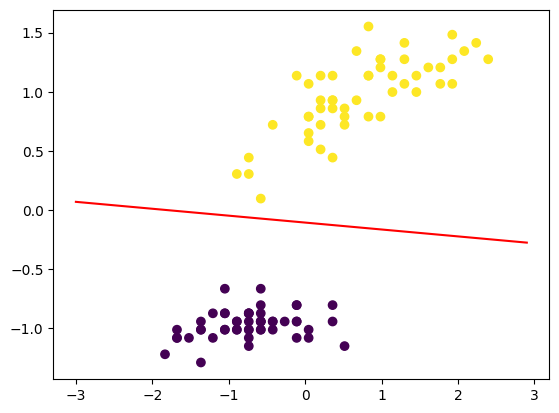

In [61]:
plt.scatter(x[:, 0], x[:, 1], c=y)

x_line = np.arange(-3, 3, 0.1)
a, b, c = svm.theta_
y_line = (- a - b * x_line) / c

plt.plot(x_line, y_line, c='r')

plt.show()